In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score, f1_score ,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [41]:
clean_df =pd.read_csv('/content/drive/MyDrive/Datasets/PCOS dataset - Sheet1.csv')
clean_df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/PCOS dataset - Sheet1.csv')
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [3]:
df2=df


In [4]:
df2

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [5]:
df.describe(include='all')


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000


In [6]:
df.shape


(541, 44)

In [60]:
df['PCOS (Y/N)'].value_counts()

,count
PCOS (Y/N),
0,364
1,177


In [7]:
df.isnull().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


In [8]:
df.columns


Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [38]:
df.dropna()
df.isnull().sum()


,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


In [37]:
df.isna().sum()


,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


In [11]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Sl. No                  541 non-null    int64   
 1   Patient File No.        541 non-null    int64   
 2   PCOS (Y/N)              541 non-null    int64   
 3    Age (yrs)              541 non-null    int64   
 4   Weight (Kg)             541 non-null    float64 
 5   Height(Cm)              541 non-null    float64 
 6   BMI                     541 non-null    float64 
 7   Blood Group             541 non-null    int64   
 8   Pulse rate(bpm)         541 non-null    int64   
 9   RR (breaths/min)        541 non-null    int64   
 10  Hb(g/dl)                541 non-null    float64 
 11  Cycle(R/I)              541 non-null    int64   
 12  Cycle length(days)      541 non-null    int64   
 13  Marraige Status (Yrs)   540 non-null    float64 
 14  Pregnant(Y/N)           54

In [12]:
fdf['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'],errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'],errors='coerce')

In [13]:
df2['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df2['II    beta-HCG(mIU/mL)'],errors='coerce')
df2['AMH(ng/mL)'] = pd.to_numeric(df2['AMH(ng/mL)'],errors='coerce')

<Axes: >

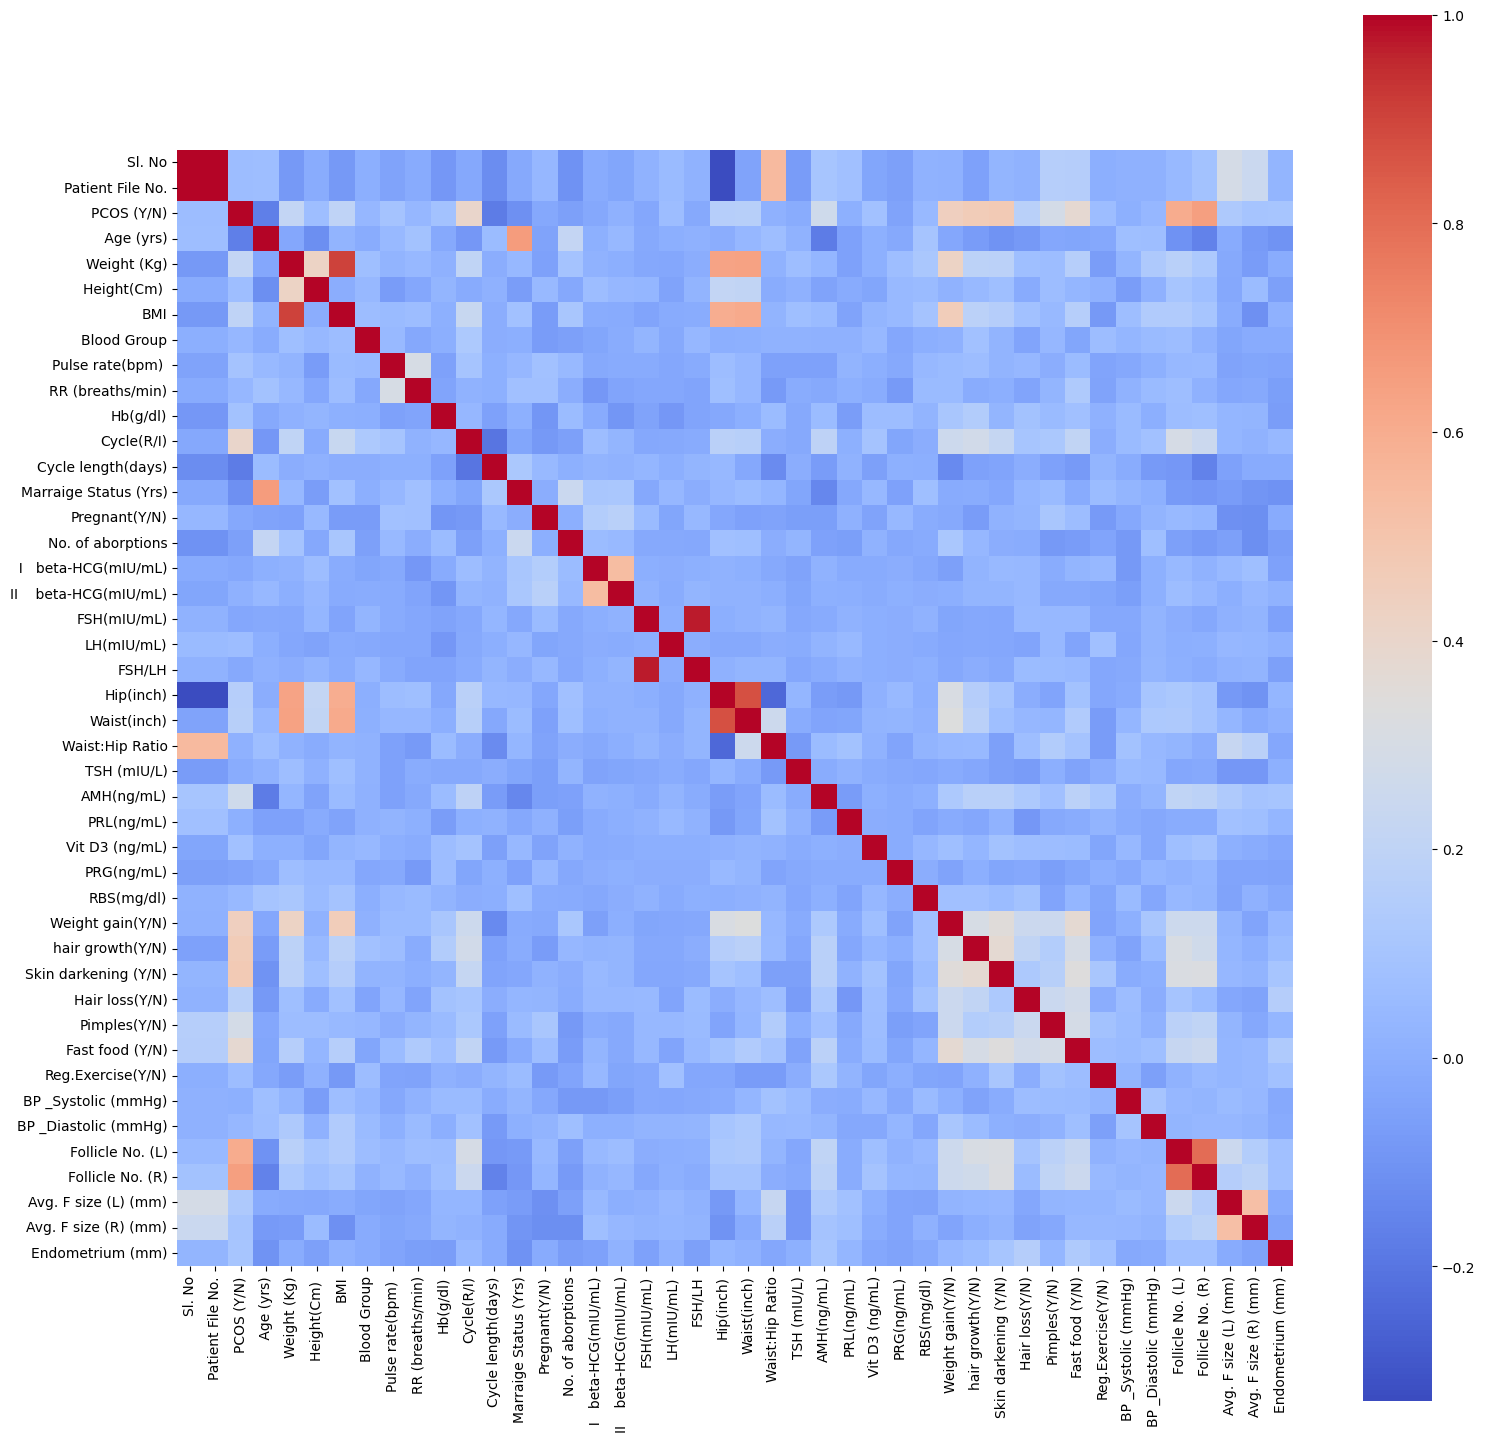

In [14]:
corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="coolwarm", square=True)

In [15]:
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

,PCOS (Y/N)
PCOS (Y/N),1.000000
Follicle No. (R),0.648327
Follicle No. (L),0.603346
Skin darkening (Y/N),0.475733
hair growth(Y/N),0.464667
Weight gain(Y/N),0.441047
Cycle(R/I),0.401644
Fast food (Y/N),0.377933
Pimples(Y/N),0.286077
AMH(ng/mL),0.263863


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

Converting to numerical data

In [28]:
# Defining age group bins and labels
age_groups = [0,18,25,35,45,float('inf')]
age_labels = ['<18','18-25','26-35','36-45','45+']
df['Age Group'] = pd.cut(df[' Age (yrs)'],bins = age_groups,labels = age_labels)

In [29]:
# Categorize the 'Age (yrs)' column into age groups
age_group_counts = df.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()
type(age_group_counts)

/tmp/ipython-input-1467622942.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()


pandas.core.frame.DataFrame

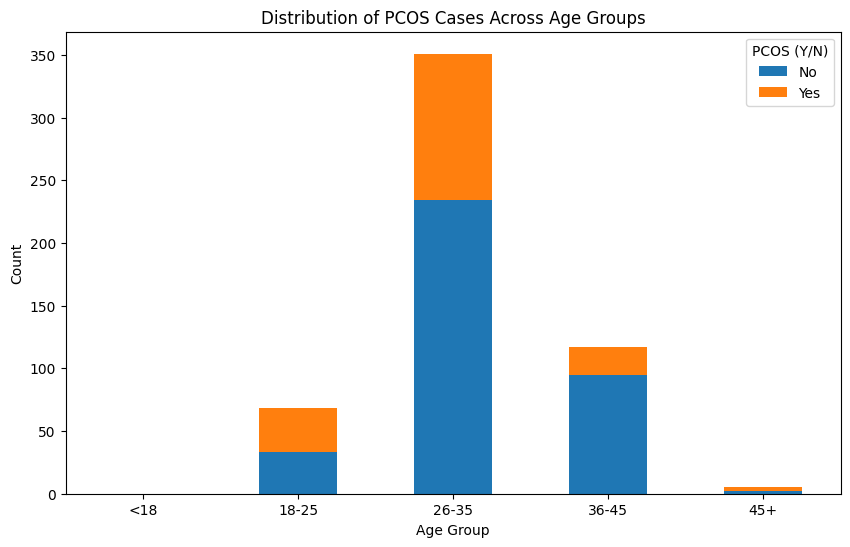

In [30]:
 age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of PCOS Cases Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='PCOS (Y/N)', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

In [31]:
# Shape of the dataset
print("Shape:", df.shape)



# Column names
print("Columns:\n", df.columns)

# Data types and nulls
df.info()

# Statistical summary
df.describe()

Shape: (541, 45)
Columns:
 Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Age Group'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


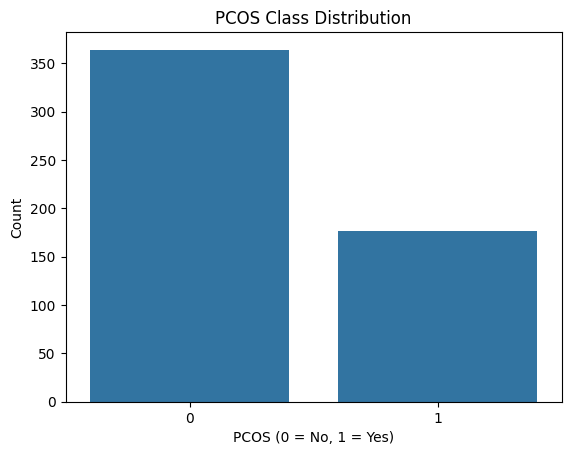

In [21]:
sns.countplot(data=df, x='PCOS (Y/N)')
plt.title("PCOS Class Distribution")
plt.xlabel("PCOS (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


<Axes: >

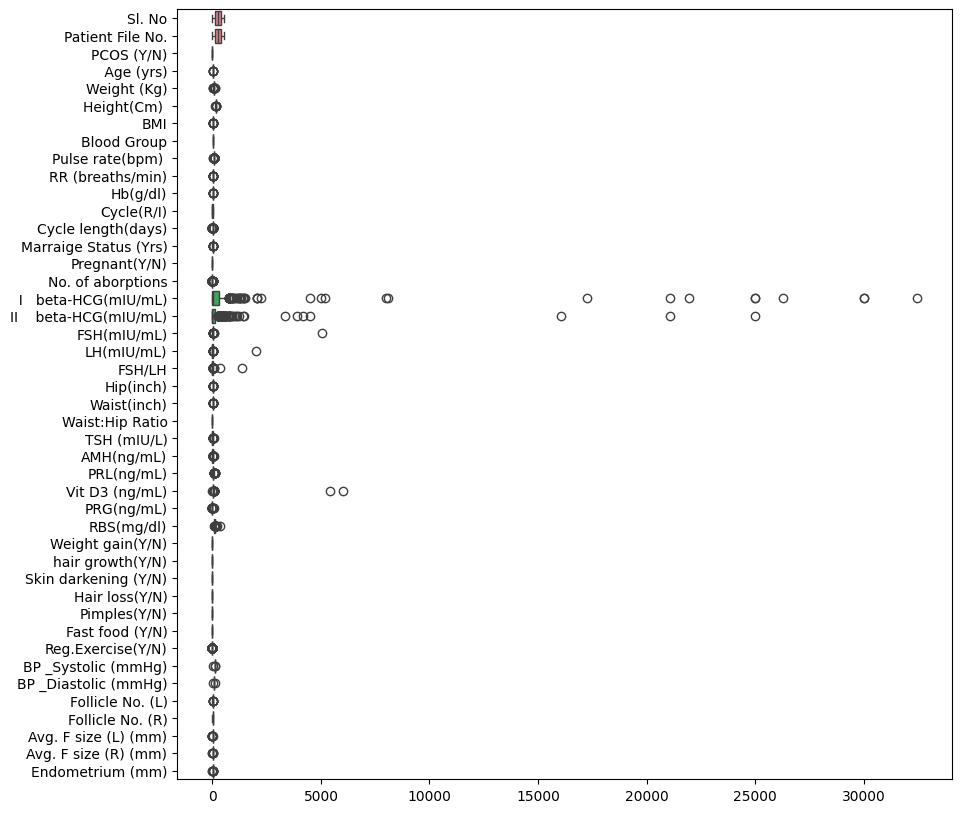

In [22]:
plt.figure(figsize=(10, 10))
sns.boxplot(df,orient='h')

In [23]:
# plt.figure(figsize=(14,10))
# sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
# plt.title("Correlation Heatmap")
# plt.show()


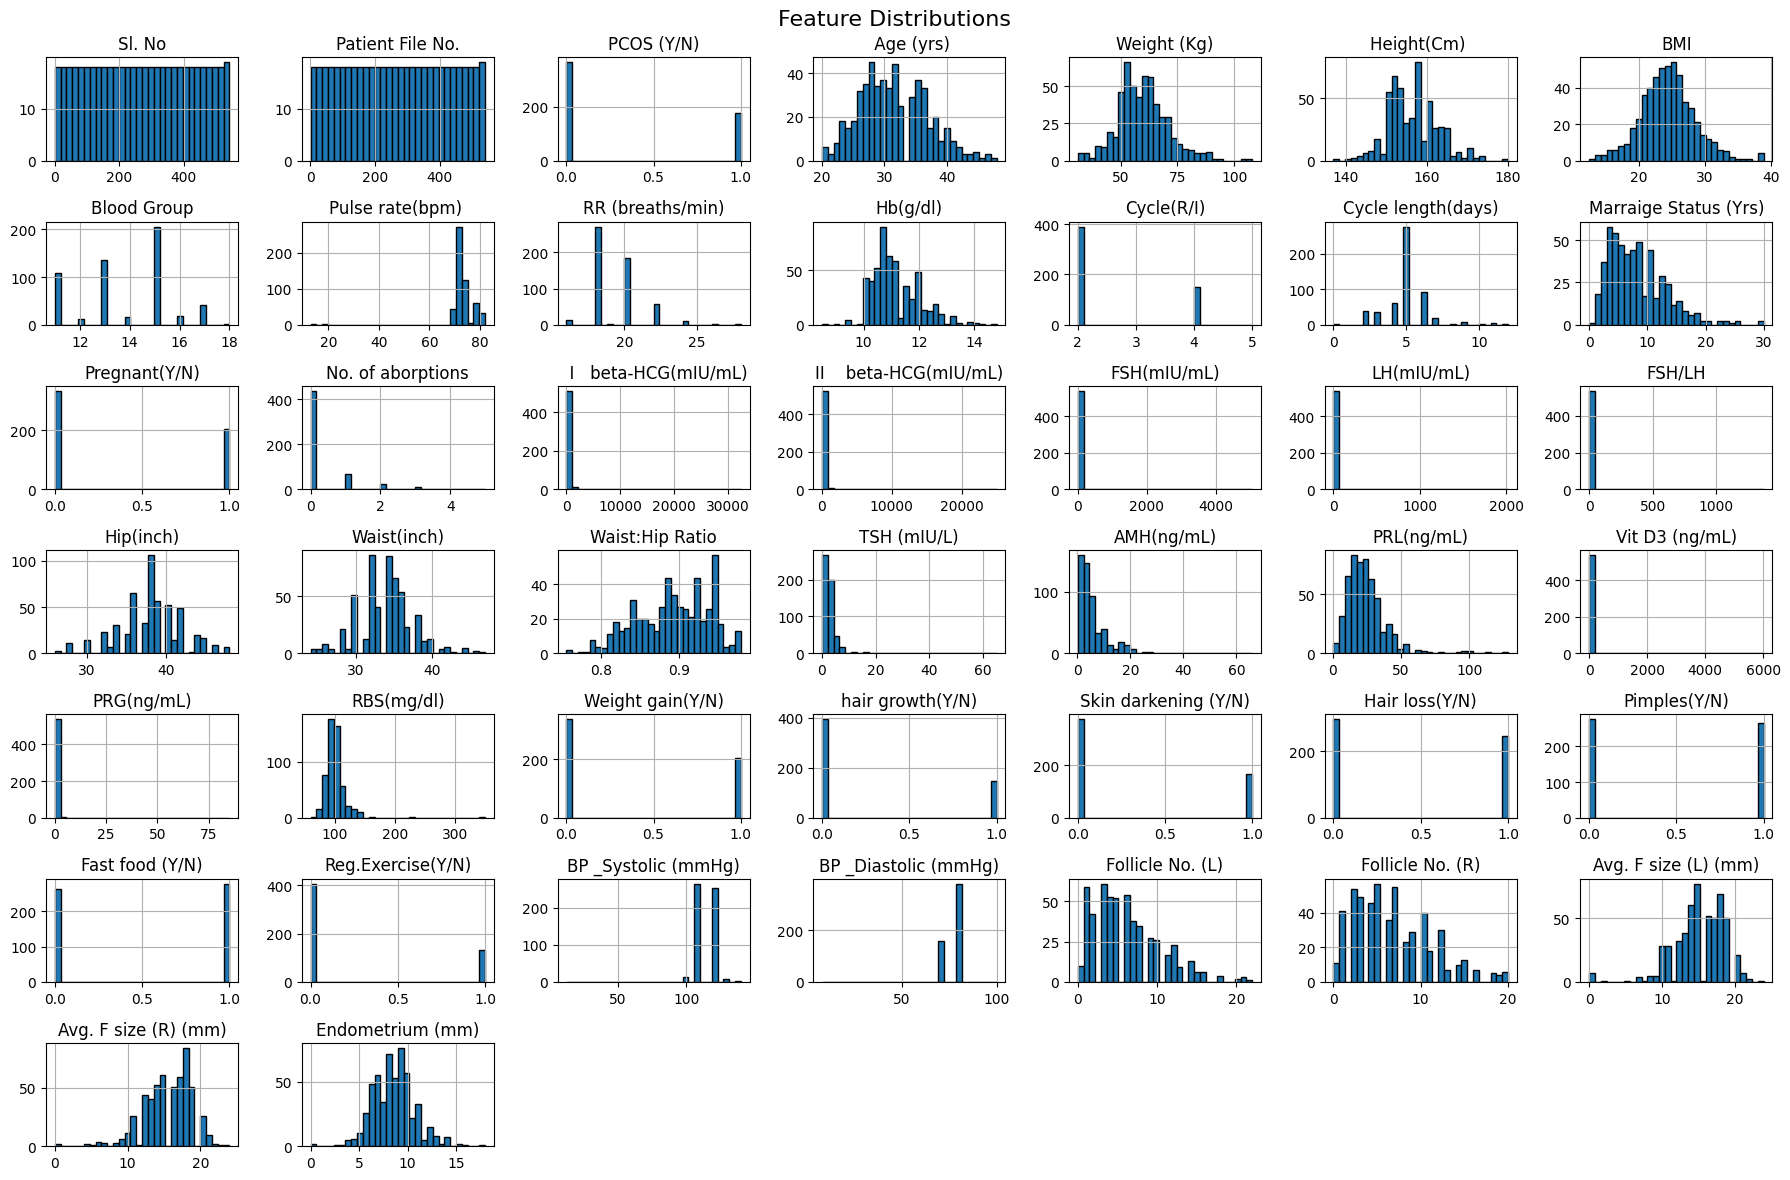

In [24]:
# Plot histograms for all numerical features
df.hist(figsize=(18, 12), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


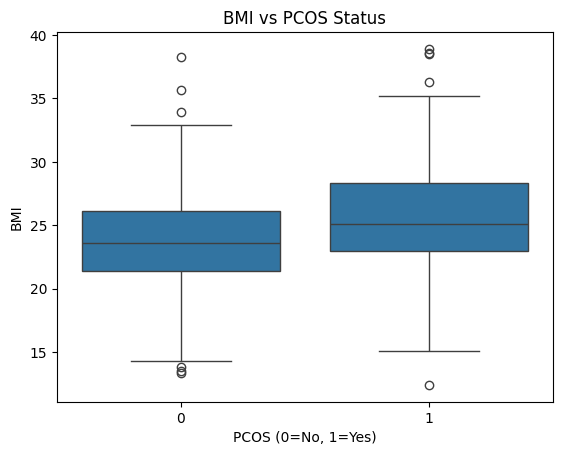

In [25]:
# Comparing BMI for PCOS vs non-PCOS
sns.boxplot(data=df, x='PCOS (Y/N)', y='BMI')
plt.title("BMI vs PCOS Status")
plt.xlabel("PCOS (0=No, 1=Yes)")
plt.ylabel("BMI")
plt.show()


Model Building and training

In [62]:
clean_df =pd.read_csv('/content/drive/MyDrive/Datasets/PCOS dataset - Sheet1.csv')
clean_df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [63]:
corr =clean_df.corr(numeric_only=True).sort_values('PCOS (Y/N)')
corr

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Cycle length(days),-0.121856,-0.121856,-0.178480,0.055918,-0.002308,0.009536,-0.006232,-0.006290,0.006423,0.005004,...,-0.050418,-0.079600,0.025641,-0.011904,-0.075775,-0.086826,-0.161263,-0.052308,-0.013944,-0.016577
Age (yrs),0.067133,0.067133,-0.168513,1.000000,-0.029734,-0.119819,0.021261,-0.010954,0.045831,0.087382,...,-0.032921,-0.037694,-0.025911,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238
Marraige Status (Yrs),-0.019416,-0.019416,-0.112897,0.662080,0.043816,-0.066747,0.084000,-0.001795,0.038784,0.077910,...,0.054997,-0.013126,0.059633,0.028831,0.005103,-0.079310,-0.087398,-0.071918,-0.097441,-0.106378
No. of aborptions,-0.107131,-0.107131,-0.057158,0.220794,0.093540,-0.025648,0.109861,-0.053956,0.046087,-0.006433,...,-0.082371,-0.071227,-0.041089,-0.083726,0.071592,-0.057649,-0.078379,-0.056992,-0.117679,-0.066610
PRG(ng/mL),-0.056345,-0.056345,-0.043834,-0.021909,0.069731,0.049741,0.049462,-0.031897,-0.017703,-0.076948,...,-0.058971,-0.037420,0.000308,-0.020737,0.032273,0.018561,0.031535,-0.040770,-0.040933,-0.047707
FSH(mIU/mL),0.016609,0.016609,-0.030319,-0.017794,-0.025750,0.030941,-0.040715,0.028109,-0.013088,-0.032427,...,0.044349,0.040879,-0.023683,-0.026889,0.023375,-0.002291,-0.025318,0.011488,0.020167,-0.048945
I beta-HCG(mIU/mL),-0.015285,-0.015285,-0.027617,0.008148,0.015994,0.062301,-0.009960,-0.035303,-0.020494,-0.085164,...,-0.011253,0.025400,0.039773,-0.081927,0.004346,0.048485,0.018390,0.049893,0.071802,-0.051375
Pregnant(Y/N),0.038878,0.038878,-0.027565,-0.044165,-0.051048,0.046365,-0.073950,-0.070906,0.082542,0.078381,...,0.107326,0.060629,-0.079578,-0.025962,0.022455,0.046257,0.030804,-0.114761,-0.117732,-0.013053
FSH/LH,0.014280,0.014280,-0.018336,0.012464,-0.004844,0.022021,-0.012077,0.036279,-0.013096,-0.043311,...,0.050395,0.045398,-0.029046,-0.019261,0.026828,0.005849,-0.007521,0.014943,0.024077,-0.053737
TSH (mIU/L),-0.073970,-0.073970,-0.010140,0.016740,0.068482,0.013504,0.071379,0.017600,-0.049812,-0.008952,...,-0.000259,-0.047114,-0.004943,0.052301,0.046345,-0.031079,-0.018995,-0.086579,-0.086789,0.005143


In [64]:
clean_df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [65]:
clean_df.dropna()


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [66]:
clean_df.isnull().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


In [67]:
if clean_df['Fast food (Y/N)'].isnull().any():
  print('yes')

yes


In [68]:
clean_df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(clean_df['II    beta-HCG(mIU/mL)'], errors='coerce')
clean_df['AMH(ng/mL)'] = pd.to_numeric(clean_df['AMH(ng/mL)'], errors='coerce')
clean_df = clean_df.astype(float)

In [69]:
for col in clean_df.columns:
    try:
        clean_df[col].astype(float)
    except ValueError as e:
        print(f"Column '{col}' contains non-numeric values: {e}")

In [70]:
clean_df.isnull().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


In [71]:
clean_df = clean_df.dropna(axis=1)
display(clean_df.head())

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Hair loss(Y/N),Pimples(Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,0.0,0.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,1.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0


In [72]:
clean_df.isnull().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


In [73]:
target = 'PCOS (Y/N)'
corr = clean_df.corr()[target].sort_values(ascending=False)
columns_to_drop = ['Sl. No', 'Patient File No.']
clean_df = clean_df.drop(columns=columns_to_drop)

In [74]:
print(corr[abs(corr) > 0.2])

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Pimples(Y/N)            0.286077
Weight (Kg)             0.211938
Name: PCOS (Y/N), dtype: float64


In [75]:
selected_columns = [
    'PCOS (Y/N)',
    'Follicle No. (R)',
    'Follicle No. (L)',
    'Skin darkening (Y/N)',
    'hair growth(Y/N)',
    'Weight gain(Y/N)',
    'Cycle(R/I)',
    'Pimples(Y/N)',
    'Weight (Kg)'
]

df_selected = clean_df[selected_columns].copy()
display(df_selected.head())

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Pimples(Y/N),Weight (Kg)
0,0.0,3.0,3.0,0.0,0.0,0.0,2.0,0.0,44.6
1,0.0,5.0,3.0,0.0,0.0,0.0,2.0,0.0,65.0
2,1.0,15.0,13.0,0.0,0.0,0.0,2.0,1.0,68.8
3,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,65.0
4,0.0,4.0,3.0,0.0,0.0,0.0,2.0,0.0,52.0


In [76]:
X_train = df_selected.drop('PCOS (Y/N)', axis=1)
y_train = df_selected['PCOS (Y/N)']

In [77]:
df_selected['PCOS (Y/N)'].value_counts(normalize =True)*100

,proportion
PCOS (Y/N),
0.0,67.28281
1.0,32.71719


In [78]:
x_train , x_test ,y_train ,y_test=train_test_split(X_train,y_train,train_size=0.2,random_state=42)

In [79]:
scaled =StandardScaler()
xtrain_scaled =scaled.fit_transform(x_train)
xtest_scaled =scaled.transform(x_test)

In [80]:
log_reg=LogisticRegression()
rf_clf=RandomForestClassifier()

In [81]:
log_reg=LogisticRegression()
log_reg.fit(xtrain_scaled, y_train)
rf_clf=RandomForestClassifier()
rf_clf.fit(xtrain_scaled, y_train)

RandomForestClassifier()

In [82]:
# Make predictions on the scaled test set
y_pred_log_reg = log_reg.predict(xtest_scaled)
y_pred_rf_clf = rf_clf.predict(xtest_scaled)

# Evaluate Logistic Regression model
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1-score:", f1_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))


# Evaluate Random Forest model
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_clf))
print("Recall:", recall_score(y_test, y_pred_rf_clf))
print("F1-score:", f1_score(y_test, y_pred_rf_clf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_clf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_clf))

Logistic Regression Model Evaluation:
Accuracy: 0.8891454965357968
Recall: 0.7659574468085106
F1-score: 0.8181818181818182
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       292
         1.0       0.88      0.77      0.82       141

    accuracy                           0.89       433
   macro avg       0.89      0.86      0.87       433
weighted avg       0.89      0.89      0.89       433

Confusion Matrix:
 [[277  15]
 [ 33 108]]

Random Forest Model Evaluation:
Accuracy: 0.8822170900692841
Recall: 0.75177304964539
F1-score: 0.8060836501901141
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       292
         1.0       0.87      0.75      0.81       141

    accuracy                           0.88       433
   macro avg       0.88      0.85      0.86       433
weighted avg       0.88      0.88      0.88       433

Confusion Matrix:

MODEL WITH SMOTE


In [ ]:
smote_df =df_selected.copy()

In [ ]:
smote_df.head()

In [ ]:
smote_df['PCOS (Y/N)'].value_counts(normalize=True)*100

In [83]:
from collections import Counter


In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

In [93]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)
print(f"Original dataset shape {Counter(y_train)}")
print(f"Resampled dataset shape {Counter(y_train_smote)}")

Original dataset shape Counter({0.0: 72, 1.0: 36})
Resampled dataset shape Counter({0.0: 72, 1.0: 72})


In [90]:
%pip install imbalanced-learn

In [94]:
log_reg_smote = LogisticRegression()
rf_clf_smote = RandomForestClassifier()

log_reg_smote.fit(X_train_smote, y_train_smote)
rf_clf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [95]:
# Make predictions on the scaled test set using SMOTE-trained models
y_pred_log_reg_smote = log_reg_smote.predict(xtest_scaled)
y_pred_rf_clf_smote = rf_clf_smote.predict(xtest_scaled)

# Evaluate Logistic Regression model trained with SMOTE
print("Logistic Regression Model Evaluation (with SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_smote))
print("Recall:", recall_score(y_test, y_pred_log_reg_smote))
print("F1-score:", f1_score(y_test, y_pred_log_reg_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg_smote))

# Evaluate Random Forest model trained with SMOTE
print("\nRandom Forest Model Evaluation (with SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_clf_smote))
print("Recall:", recall_score(y_test, y_pred_rf_clf_smote))
print("F1-score:", f1_score(y_test, y_pred_rf_clf_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_clf_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_clf_smote))

Logistic Regression Model Evaluation (with SMOTE):
Accuracy: 0.8914549653579676
Recall: 0.8014184397163121
F1-score: 0.8278388278388278
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       292
         1.0       0.86      0.80      0.83       141

    accuracy                           0.89       433
   macro avg       0.88      0.87      0.87       433
weighted avg       0.89      0.89      0.89       433

Confusion Matrix:
 [[273  19]
 [ 28 113]]

Random Forest Model Evaluation (with SMOTE):
Accuracy: 0.8822170900692841
Recall: 0.7801418439716312
F1-score: 0.8118081180811808
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       292
         1.0       0.85      0.78      0.81       141

    accuracy                           0.88       433
   macro avg       0.87      0.86      0.86       433
weighted avg       0.88      0.88      0.88 